<a href="https://colab.research.google.com/github/ffakhirah/Vehicle-Efficiency-Prediction-and-Classification/blob/main/Latihan_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4><b>Nama			:</b> Siti Farah Fakhirah<br>
<b>NIM				:</b> J0403221039<br>
<b>Kelas			:</b> B1<br></h4>

# **Regresi Linear**

Saat ini kita akan memprediksi konsumsi bahan bakar (mpg) berdasarkan karakteristik mobil tertentu.

In [ ]:
from google.colab import drive
import sys
import os
drive.mount('/content/drive')
drivePath = ('/content/drive/MyDrive/Mata Kuliah Semester 6/Visual Komputer Cerdas (TPL1310)/Pertemuan 6/Bahan Belajar')
sys.path.append(drivePath)
os.chdir(drivePath)
current_dir = os.getcwd()
current_dir

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Mata Kuliah Semester 6/Visual Komputer Cerdas (TPL1310)/Pertemuan 6/Bahan Belajar'

In [ ]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mobil = pd.read_csv('auto-mpg.csv')
mobil.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Woopss! kita menemukan bahwa tipe data dari kolom horsepower itu bertipe "Object". Seharunya bertipe numerik (int64 atau float64) karena kolom ini menunjukkan tenaga mesin dalam bentuk angka. jadi mari kita cek terlebih dahulu isi dari data pada kolom horsepower, dengan melihat nilai unique dari kolom horsepower.

In [ ]:
#investigasi hal janggal yaitu horsepower, karena pada info terteras memiliki tipe object, seharusnya float64 atau int64
mobil['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

dari hasil diatas, terlihat ada data "?" diantara data numeric. Selanjutnya kita periksa berapa data yang memiliki "?" didalam kolom "horsepower".

In [ ]:
mobil[mobil['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


Terlihat data yang memiliki nilai "?" ada 6, karena kecil. jadi kita putuskan untuk menghapus data tsb. Namun, apabila banyak data yang tidak sesuai, bisa kita pikirkan bagaimana inisiasi untuk hal tsb. Kita dapat menggunakan mean atau median untuk mengganti missing value, dengan catatan.

1. Kapan menggunakan Mean?
- Data berdistribusi normal (tidak ada outlier ekstrem).
- Data relatif seimbang dan tidak memiliki banyak nilai ekstrem.

2. Kapan menggunakan Median?
-  Data memiliki outlier (nilai ekstrem yang jauh dari mayoritas data).
-  Distribusi data tidak normal atau condong ke salah satu sisi (skewed).

In [ ]:
# menghilangkan semua MISSING value dan karakter "?"
mobil = mobil.dropna()
mobil = mobil[mobil['horsepower'] != '?']

# memperbaiki tipe data horsepower
mobil['horsepower'] = pd.to_numeric(mobil['horsepower'])
mobil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


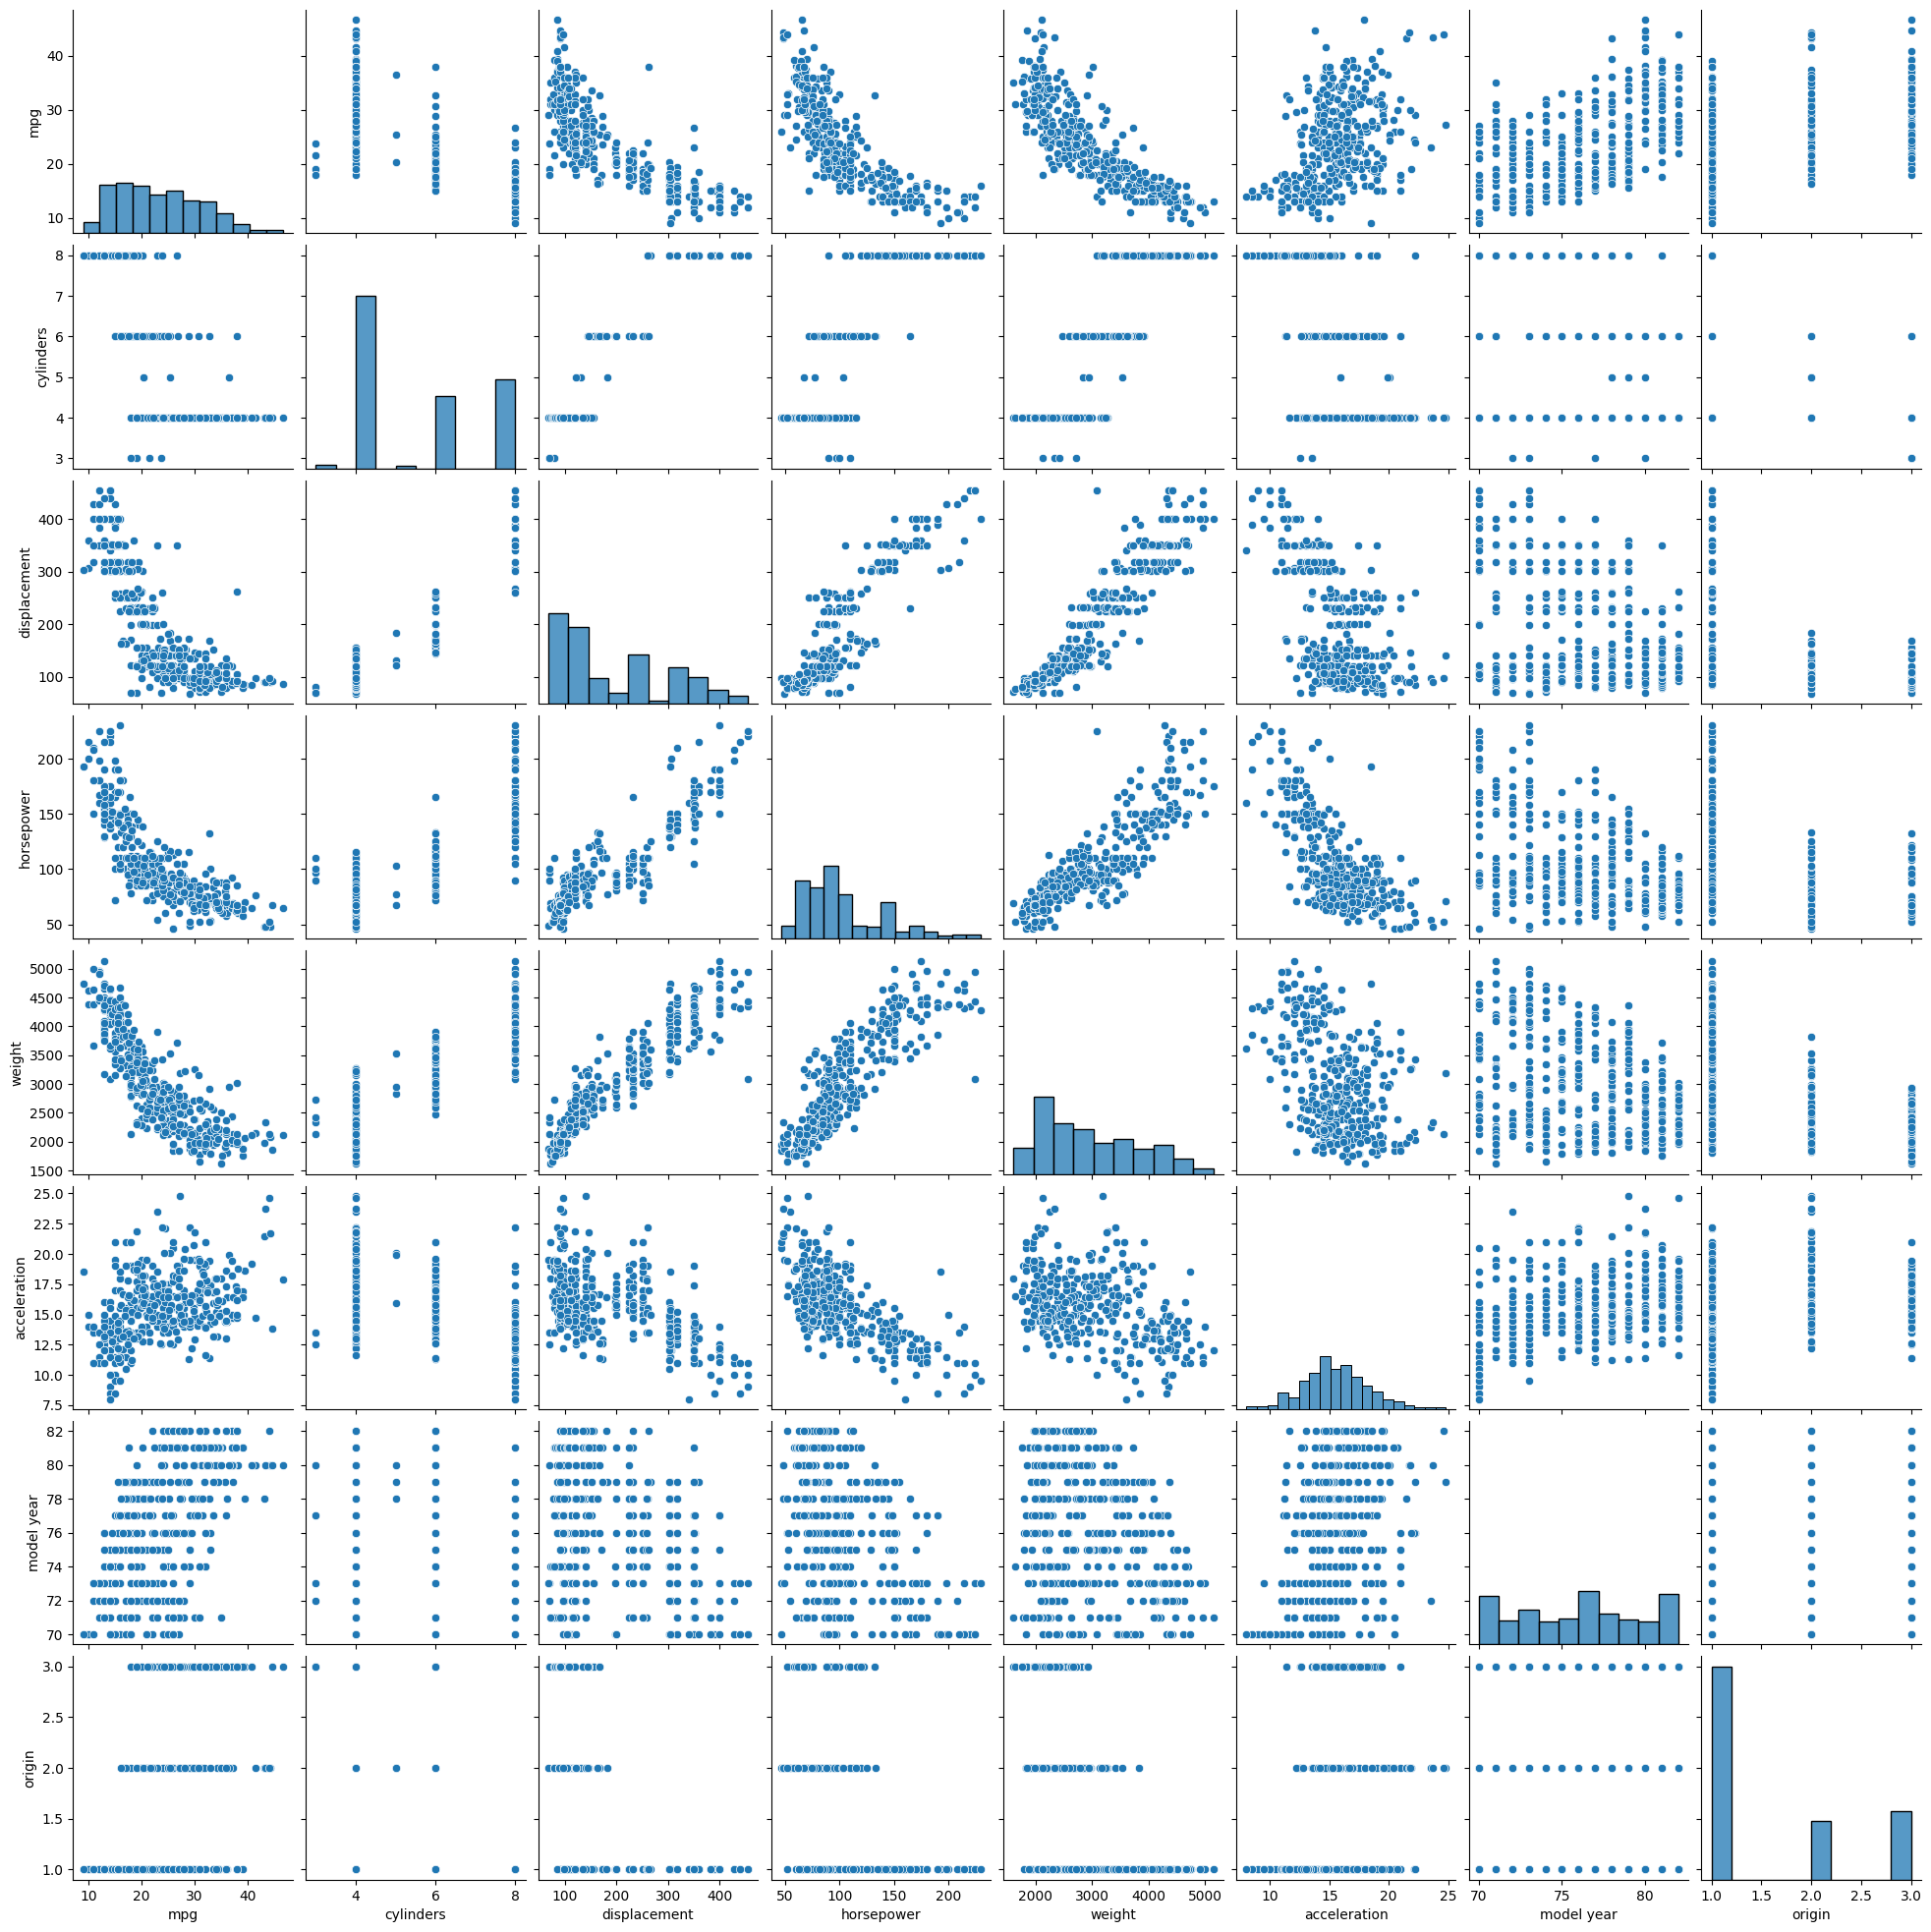

In [ ]:
sns.pairplot(mobil)
plt.show()

selanjutnya pada seleksi fitur, kita tidak akan menggunakan model year, origin, dan acceleration. dengan alasan

1. Model Year: bukan faktor teknis langsung terhadap bbm (mpg)
2. Origin: Fitur kategorikal, bukan numerik. Asal negara tidak memberikan informasi teknis langsung tentan konsumsi BBM.
3. Accelertion: Tidak memiliki hubungan langsung atau kuat dengan konsumsi BBM

In [ ]:
# pemilihan fitur 'cylinders', 'displacement', 'horsepower', 'weight'
mobil_features = mobil[['cylinders', 'displacement', 'horsepower', 'weight']] #dipilih fitur 'cylinders', 'displacement', 'horsepower', 'weight'.
mobil_features = mobil_features.apply(pd.to_numeric) #memastikan bahwa semua data dalam mobil_features bertipe numerik

mobil_labels = mobil['mpg'] #menyimpan data dari kolom "mpg"

In [ ]:
# transformasi data
# di Indonesia kita mau pakai KG
mobil_features['weight'] = mobil_features['weight'] * 0.4535923

# transformasi M/G (Miles per Gallon) menjadi KM/L
mobil_labels= mobil_labels * 0.4251437

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mobil_features = scaler.fit_transform(mobil_features)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mobil_features,
    mobil_labels,
    test_size=0.2, random_state=0)

### **Pelatihan Model**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Evaluasi Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_predicted = model.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted)) # selisih nilai aktual dan nilai yang diprediksi, nilai error semakin kecil semakin baik karena hasilnya berarti lebih besar nilai aktualnya.
print('R2: %.2f' % r2_score(y_test, y_predicted)) # R2 jika mendekati 1 semakin baik, begitupun sebaliknya

Mean squared error: 3.37
R2: 0.70


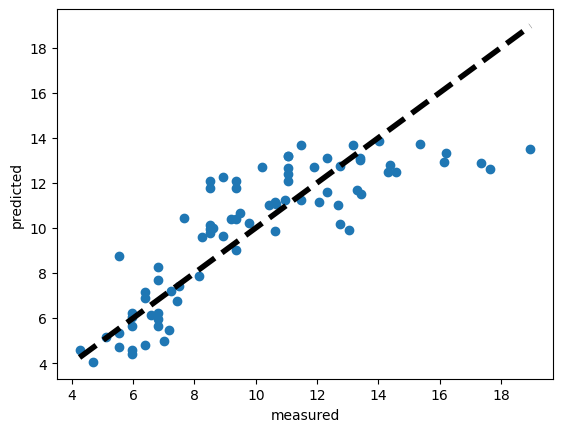

In [ ]:
# plot perbandingan prediksi dan nilai asli
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

# Regresi Logistic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Library untuk oversampling
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Sebelum melakukan proses klasifikasi, data harus dipersiapkan terlebih dahulu agar siap untuk diolah `pre-processing` dengan tujuan meminimalkan kesalahan dan mengoptimalkan model yang akan dihasilkan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Berdasarkan info tersebut, tidak terdapat data yang hilang. Semua kolom memiliki jumlah item yang sama.

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Namun, jika diperhatikan terdapat nilai yang aneh pada skintickness dan insulin terdapat nilai 0. Nilai nol tersebut tidak mungkin karena insulin pasti nilainya diatas 0.

Setelah ditelusuri, terdapat 5 kolom yang bernilai 0 diantaranya 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', dan 'BMI'. Langkah selanjutnya adalah mengganti nilai 0 sebagai nilai yang hilang.

In [ ]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Berdasarkan hasil analisa dataset Pima Indians, diketahui bahwa tidak semua atribut memiliki nilai yang lengkap. Kelengkapan atribut ini akan menentukan seberapa baik hasil dari pengklasifikasi. Jumlah `data tidak lengkap` pada masing-masing atribut yaitu atribut jumlah `glukosa sebanyak 5`, atribut `tekanan darah sebanyak 35`, atribut `ketebalan trisep sebanyak 227`, atribut `insulin sebanyak 374`, atribut `IMB sebanyak 11`, sedangkan atribut umur dan kelas memiliki nilai yang lengkap.

Atribut yang memiliki missing value akan dilakukan proses imputation menggunakan pendekatan median

In [ ]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Setelah itu, kita akan melakukan analisis korelasi - merupakan teknik analisis yang digunakan untuk mengukur kuat lemahnya hubungan dua variabel. Variabel ini terdiri dari variabel bebas dan tergantung. Besarnya hubungan berkisar antara 0-1. Pada kasus ini, menggunakan korelasi pearson. Korelasi pearson digunakan untuk mengetahui ada tidaknya hubungan antara 2 variabel, yaitu variabel bebas dan variabel tergantung yang berskala interval atau rasio (parametrik).

<Axes: >

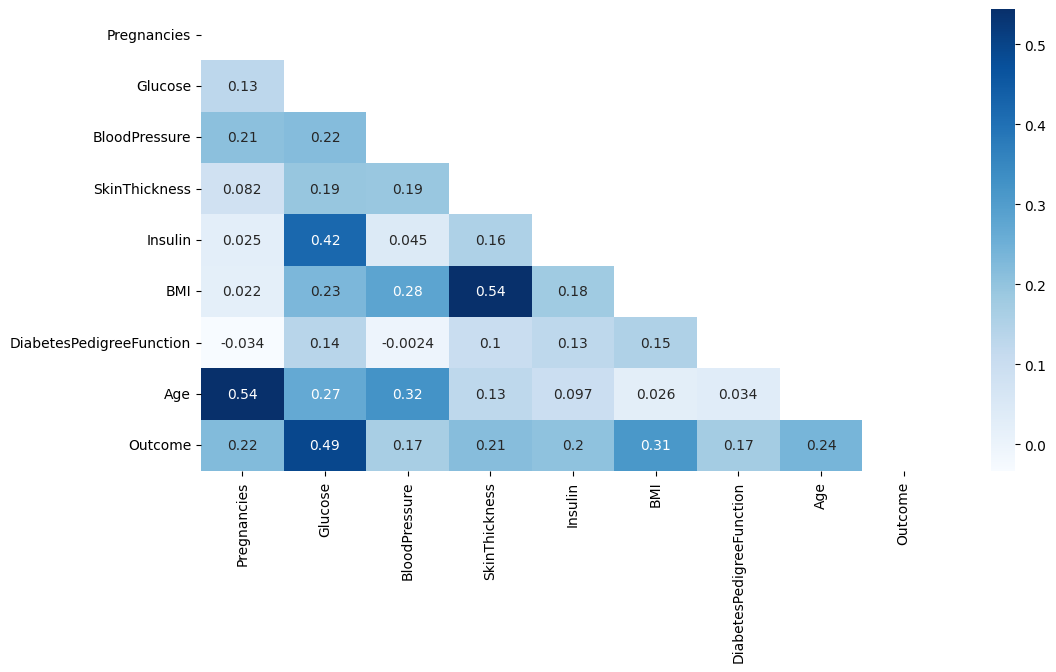

In [ ]:
plt.figure(figsize=(12,6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues', mask=matrix)

Atribut (pregnancy) kehamilan dan umur (age) serta BMI dan Skin Tickness memiliki korelasi yang cukup kuat dengan nilai 0.54 artinya lebih kurang 50% atribut tersebut berkolerasi.

Jumlah diabetic:  268
Jumlah healthy:  500


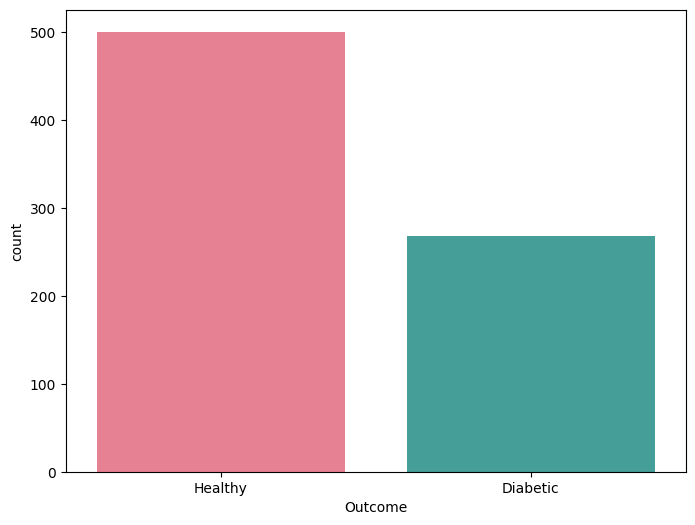

In [ ]:
from matplotlib.pyplot import figure, show

figure(figsize=(8,6))
ax = sns.countplot(x=df['Outcome'], data=df, palette="husl")
ax.set_xticklabels(["Healthy", "Diabetic"])
healthy, diabetics = df['Outcome'].value_counts().values
print("Jumlah diabetic: ", diabetics)
print("Jumlah healthy: ", healthy)

###Hasil Pelatihan dan Pengujian

In [ ]:
#Pecah daya menjadi train dan test
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
logmodel = LogisticRegression(max_iter=200, )
logmodel.fit(X_train, y_train)
prediction1 = logmodel.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('Classification Report:\n', classification_report(y_test, prediction1))
print("accuracy score:\n%.2f" % accuracy_score(y_test, prediction1))

#precision itu untuk mengecek akurasi/ketetapan pemodelan
#recall itu sensitivitas (dia membagi ke samping (actual))
#f1-score itu rata-rata dari precision dan recal

Confusion Matrix:
 [[124  27]
 [ 33  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

accuracy score:
0.74


Berdasarkan hasil evaluasi model Regresi Logistik, diperoleh `akurasi sebesar 74%`, yang menunjukkan bahwa model dapat memprediksi dengan benar 74% dari total data uji. Berdasarkan Confusion Matrix, model lebih baik dalam mengklasifikasikan pasien non-diabetes (kelas 0) dibanding pasien yang benar-benar memiliki diabetes (kelas 1). Hal ini terlihat dari precision kelas 0 sebesar 79% dan recall kelas 0 sebesar 82%, yang menunjukkan bahwa sebagian besar prediksi pasien non-diabetes benar.

Namun, `model masih mengalami kesulitan dalam mendeteksi pasien yang benar-benar memiliki diabetes`, dengan precision kelas 1 sebesar 64% dan recall kelas 1 hanya 59%, yang berarti masih ada cukup banyak kasus diabetes yang tidak terdeteksi dengan baik. Hal ini menyebabkan F1-score untuk kelas 1 hanya 0.61, menunjukkan bahwa model belum optimal dalam menangani ketidakseimbangan data antar kelas.

###Melakukan proses oversampling
**bold text**
Ketika jumlah data dalam kelas 0 (non-diabetes) lebih banyak dibanding kelas 1 (diabetes), model cenderung lebih baik dalam mengenali kelas mayoritas dan kurang akurat dalam mengenali kelas minoritas. Maka, perlu dilakukan proses oversampling untuk menambah data sintetis pada kelas minoritas. Keuntungan melakukan oversampling yaitu dapat menyeimbangkan jumlah data di setiap kelas tanpa mengurangi data asli.

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
logmodel = LogisticRegression(max_iter=200, solver='liblinear', penalty='l2')
logmodel.fit(X_train_resampled, y_train_resampled)
prediction1 = logmodel.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('Classification Report:\n', classification_report(y_test, prediction1))
print("accuracy score:\n%.2f" % accuracy_score(y_test, prediction1))

#precision itu untuk mengecek akurasi/ketetapan pemodelan
#recall itu sensitivitas (dia membagi ke samping (actual))
#f1-score itu rata-rata dari precision dan recal

Confusion Matrix:
 [[109  42]
 [ 27  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231

accuracy score:
0.70


Setelah menerapkan SMOTE `oversampling`, recall kelas 1 meningkat (dari 59% ke 66%), artinya model lebih baik dalam mendeteksi pasien diabetes. Namun, akurasi keseluruhan turun sedikit (dari 74% ke 70%), karena model lebih fokus pada kelas minoritas.

# K-NN

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#Baca dataset MPG
df = pd.read_csv('auto-mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
#menghilangkan semua missing value dan karakter "?"
df = df.dropna()
df = df[df['horsepower'] != '?']
#memperbaiki tipe data horsepower
df['horsepower'] = pd.to_numeric(df['horsepower'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


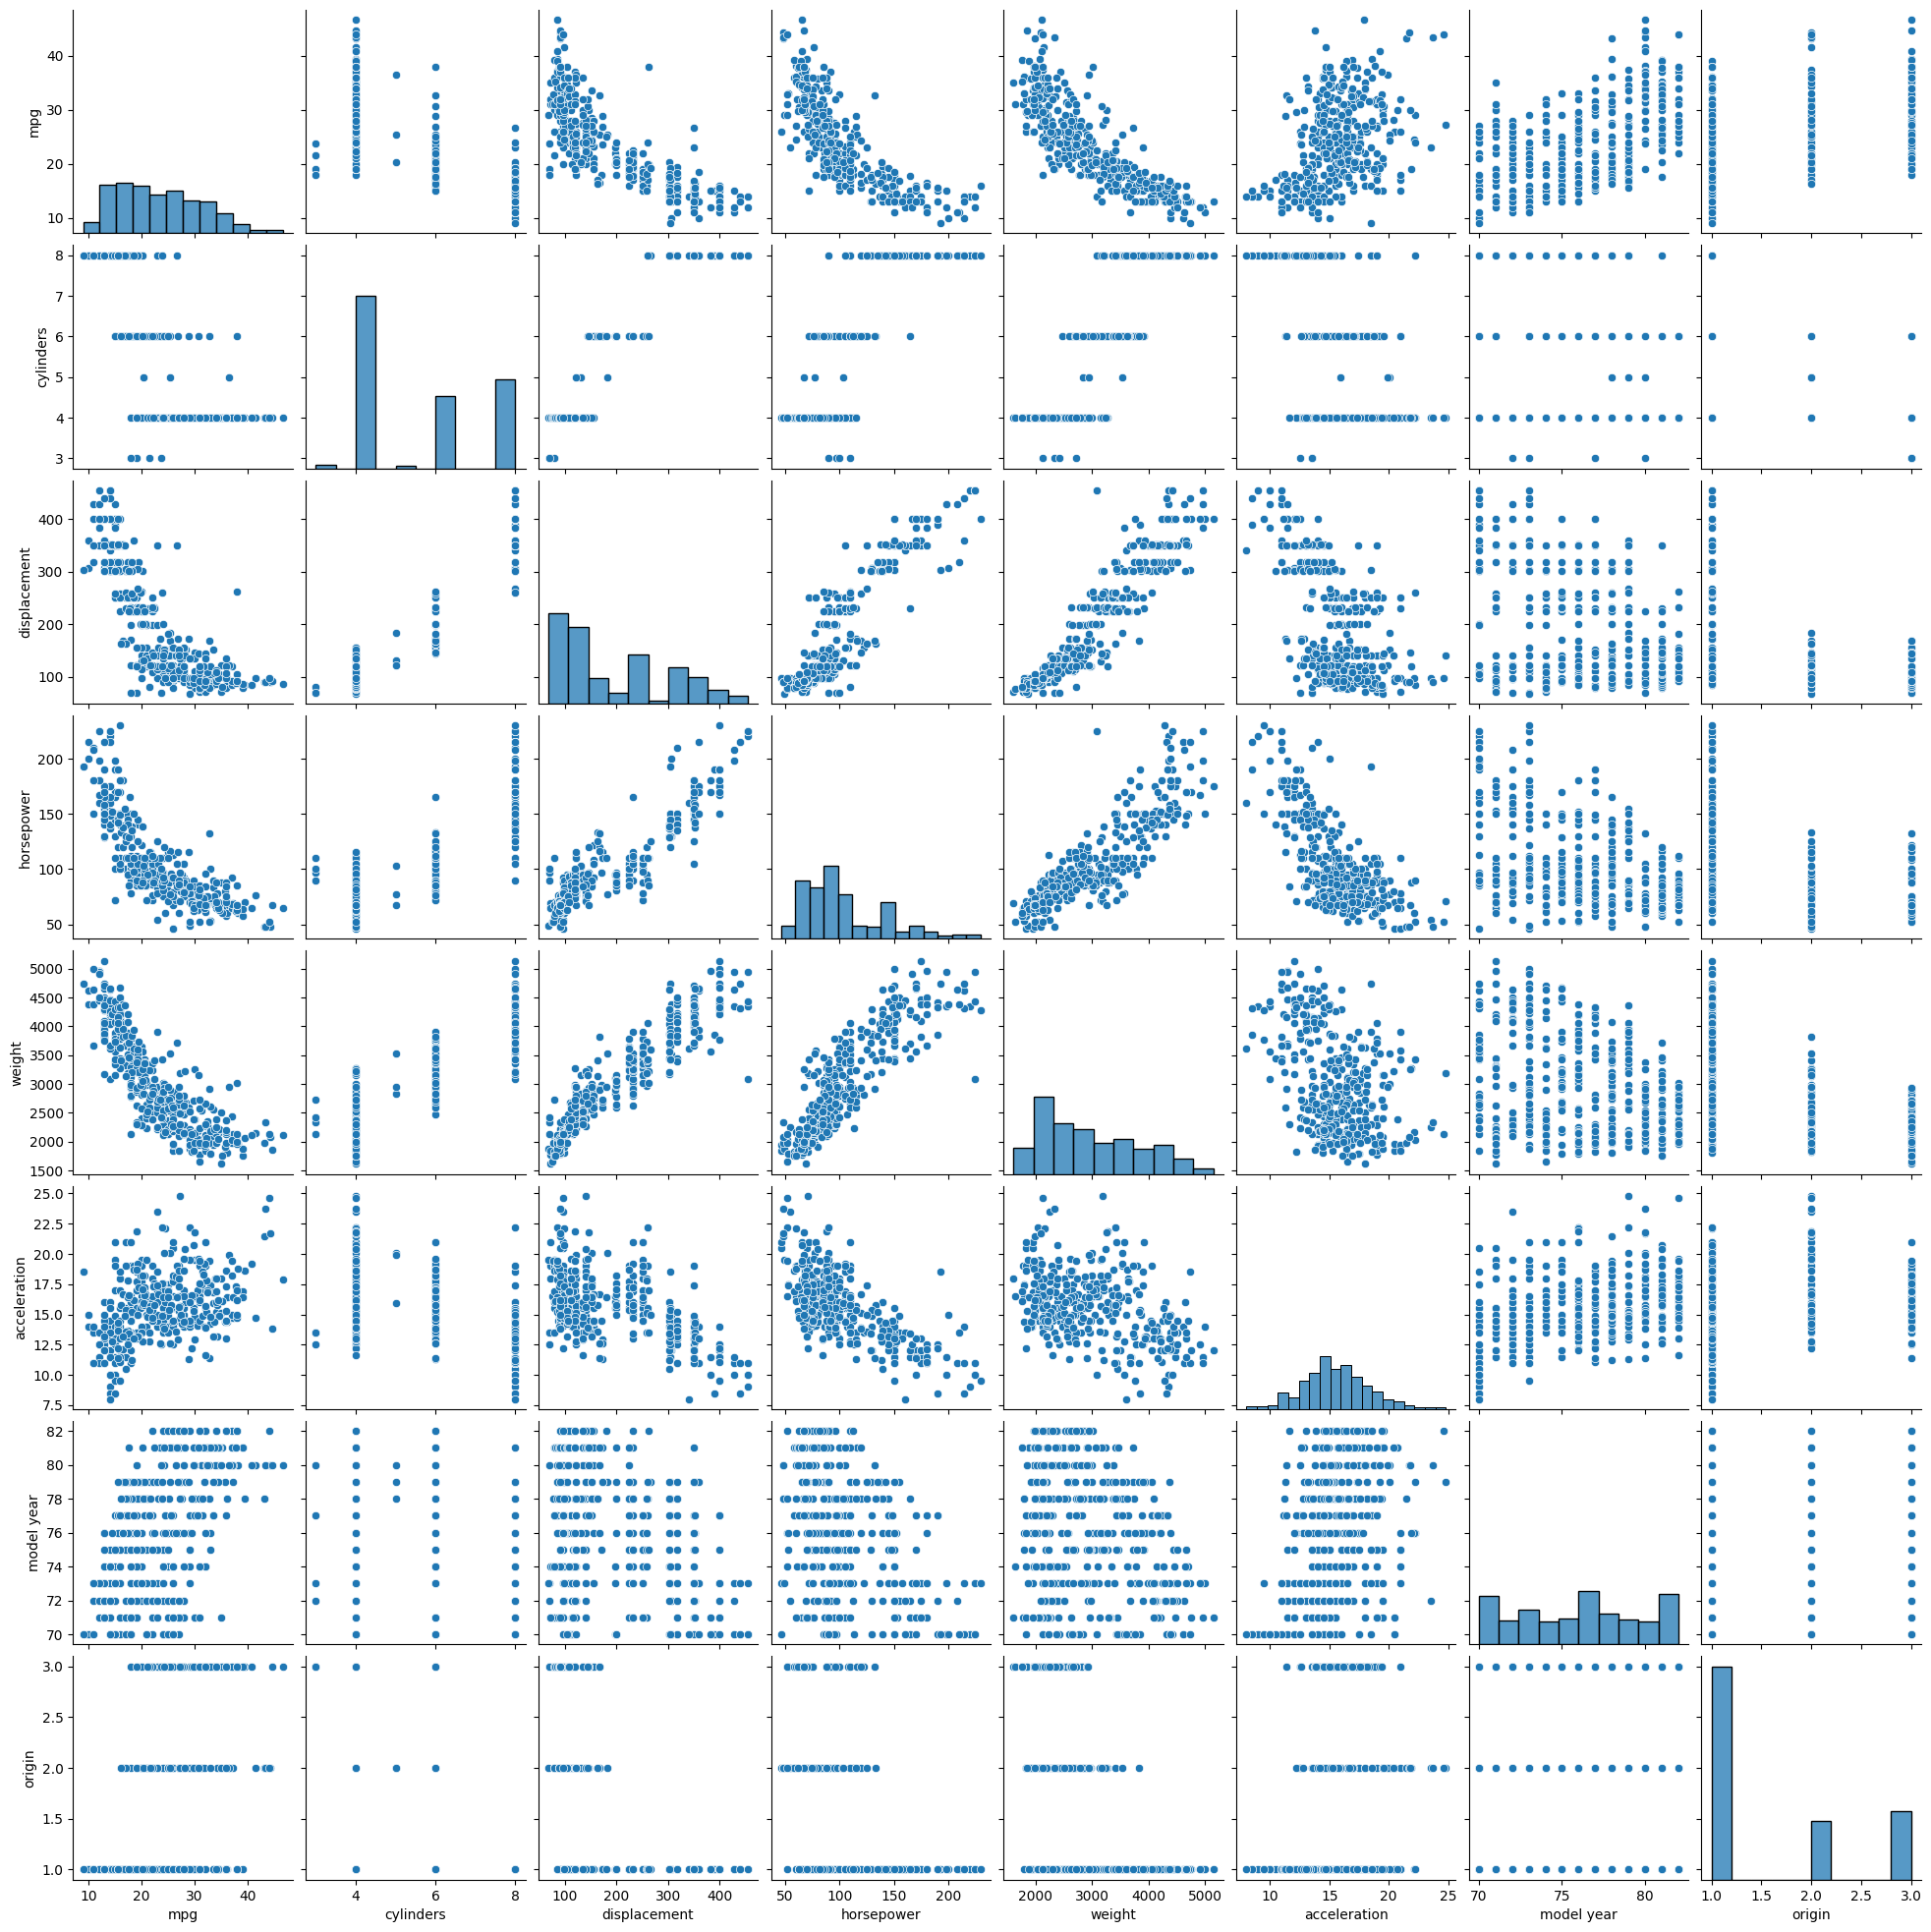

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor

# Assuming 'df' contains your data and 'mpg' is the target variable
X = df[['cylinders', 'displacement', 'horsepower', 'weight']]  # Features
y = df['mpg']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train) # Now using the scaled data

KNeighborsRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

y_pred = knn.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.6875478147025589
MAE: 3.0103797468354436


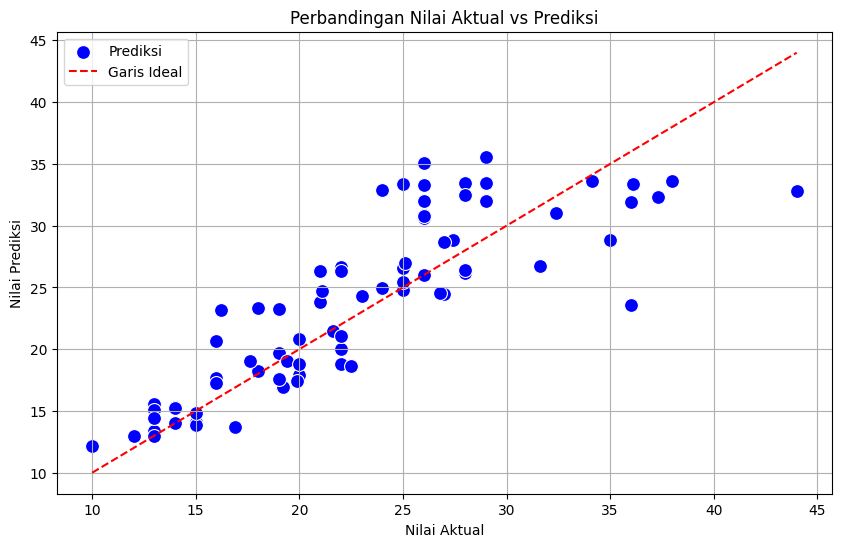

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat DataFrame untuk visualisasi
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=result_df, color='blue', label='Prediksi', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Garis Ideal')

plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.grid(True)
plt.show()


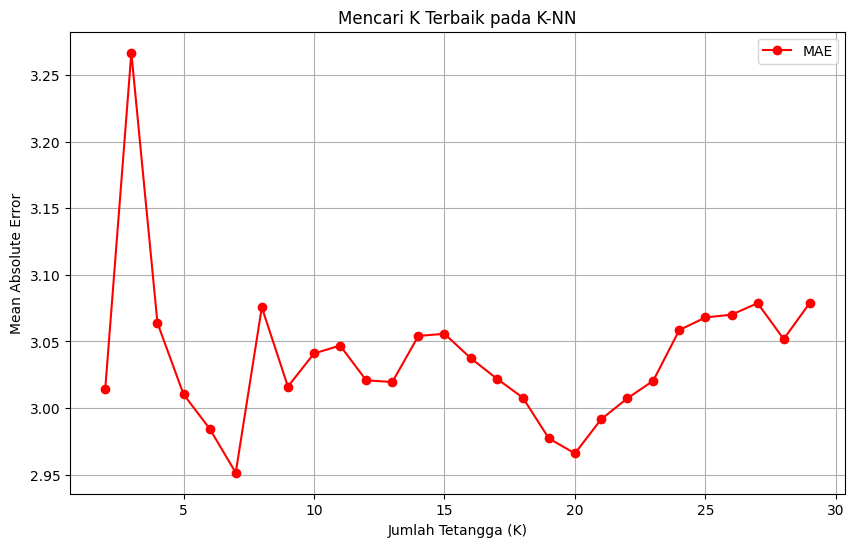

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Mencari K Terbaik
K = np.arange(2, 30)  # Range K dari 2 sampai 30
scores = []

# Looping untuk tiap nilai K
for k in K:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)  # Training
    y_pred = model.predict(X_test_scaled)  # Prediksi
    score = mean_absolute_error(y_test, y_pred)  # Evaluasi menggunakan MAE
    scores.append(score)

# Plot Grafik
plt.figure(figsize=(10, 6))
plt.plot(K, scores, color='red', linestyle='-', marker='o', label='MAE')
plt.title("Mencari K Terbaik pada K-NN")
plt.xlabel("Jumlah Tetangga (K)")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.grid(True)
plt.show()


# Decision Tree

**1. Preprocessing Data**

In [ ]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Mengimpor dataset
df = pd.read_csv('auto-mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Berdasarkan informasi diatas, kolom **horsepower** memilii tipe **object**. Seharusnya **numerik** dengan tipe data float64 atau int64. Oleh karena itu, diperlukan pemrosesan pada horsepower untuk meminimlaisir terjadi error.

In [ ]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


Terdapat sejumlah 6 missing value pada data horsepower. Karena masih tergolong sedikit, maka data akan diabaikan dengan cara dihapus. Setelah dibersihkan, total jumlah data menjadi 392

In [ ]:
# Menghapus missing value dan karakter "?" pada data
df = df.dropna()
df = df[df['horsepower'] != '?']

# Mengubah tipe data horsepower ke numeric
df['horsepower'] = pd.to_numeric(df['horsepower'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Menentukan threshold berdasarkan median weight
median_weight = df["weight"].median()

# Menambahkan kolom is_suv: 1 jika weight > median, 0 jika sebaliknya
df["is_suv"] = (df["weight"] > median_weight).astype(int)

# Menampilkan distribusi kelas SUV vs Non-SUV
df["is_suv"].value_counts()

# Memilih fitur yang akan digunakan untuk prediksi
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]
X = df[features]
y = df["is_suv"]

Selanjutnya dilakukan klasifikasi untuk menentukan target. Dalam kasus SUV ini, kolom berat kendaraan (weight) sebagai indikator apakah kendaraan termasuk dalam kategori SUV atau bukan. Akan ditambahkan kolom baru untuk mengkategorikan dengan aturan berikut:
* Jika weight lebih dari median, dikategorikan sebagai SUV (1) yang menggambarkan mobil dengan konsumsi bahan bakar efisien (MPG tinggi).
* Jika weight kurang dari atau sama dengan median, dikategorikan sebagai Non-SUV (0) yang menggambarkan mobil dengan konsumsi bahan bakar boros (MPG rendah).

**2. Feature Selection dan Model**

Sebelum melatih model, dilakukan pembagian dataset menjadi 75% data training dan 25% data testing.

In [ ]:
# Menjadi dataset ke dalam Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 0)

Dalam algoritma berbasis jarak seperti Decision Tree, feature scaling diperlukan untuk menghindari bias terhadap fitur dengan skala yang lebih besar.


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Selanjutnya, model Decision Tree diinisiasi untuk proses klasifikasi. Kriteria entropy digunakan untuk mengukur ketidakpastian dalam dataset. Model akan membuat pemisahan berdasarkan informasi yang paling mengurangi ketidakpastian.

In [ ]:
# Membuat model Decision Tree Classification terhadap Training set
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Memprediksi hasil test set
y_pred = classifier.predict(X_test)

**3. Evaluasi Model**

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Confusion Matrix:
[[51  0]
 [ 1 46]]
Accuracy: 0.9897959183673469
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        47

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



**Convusion Matrix**
* True Positives (TP) = 46 → Model memprediksi kelas 1 dengan benar.
* True Negatives (TN) = 51 → Model memprediksi kelas 0 dengan benar.
* False Positives (FP) = 0 → Model salah memprediksi kelas 0 sebagai kelas 1.
* False Negatives (FN) = 1 → Model salah memprediksi kelas 1 sebagai kelas 0.

Dari hasil diatas, berarti artinya hanya ada satu mobil irit yang diklasifikasikan sebagai boros, yang berarti model hampir selalu benar dalam mengenali mobil efisien.

---

**Akurasi**
Model memiliki akurasi yang sangat tinggi (98.98%), yang menunjukkan bahwa hampir semua prediksi benar.

---

**Classification Report**

1. Precision
* Untuk kelas 0: 0.98 → Dari semua yang diprediksi sebagai 0, 98% benar.
* Untuk kelas 1: 1.00 → Dari semua yang diprediksi sebagai 1, 100% benar.

2. Recall
* Untuk kelas 0: 1.00 → Semua data kelas 0 diprediksi dengan benar.
* Untuk kelas 1: 0.98 → Hanya 98% dari kelas 1 yang diprediksi dengan benar (karena ada 1 FN).

3. F1-Score
Kombinasi Precision dan Recall, mendekati 1 menunjukkan performa model yang sangat baik.

4. Support
Jumlah data uji untuk masing-masing kelas (0 memiliki 51, 1 memiliki 47).

**4. Visualisasi Hasil**

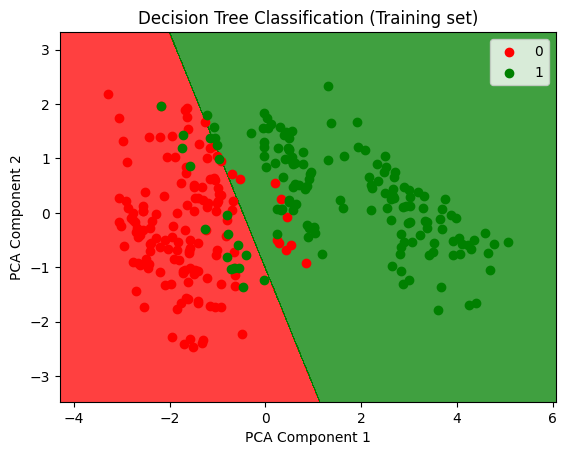

In [ ]:
# Visualisasi hasil model Decision Tree Classification dari Training set
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
# Instead of creating a meshgrid of 2 features, consider using PCA to reduce dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_set = pca.fit_transform(X_set)
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

# Predict on the transformed data
plt.contourf(X1, X2, classifier.predict(pca.inverse_transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree Classification (Training set)')
plt.xlabel('PCA Component 1')  # Update x-axis label
plt.ylabel('PCA Component 2')  # Update y-axis label
plt.legend()
plt.show()

Pada gambar pertama (Training Set), model Decision Tree telah membagi area ruang fitur menjadi dua kelas yang berbeda dengan warna merah (kelas 0) dan hijau (kelas 1). Batas keputusan (decision boundary) terlihat cukup tajam dengan pemisahan yang jelas antara dua kelas.

* Sebagian besar titik merah berada di area merah dan sebagian besar titik hijau berada di area hijau, menunjukkan bahwa model telah belajar pola data dengan baik.
* Namun, terdapat beberapa titik hijau yang berada di area merah dan beberapa titik merah yang berada di area hijau, yang menunjukkan bahwa model mengalami sedikit kesalahan klasifikasi dalam data pelatihan.
* Model tampaknya menggunakan aturan pemisahan yang cukup sederhana, dengan batas keputusan berbentuk garis lurus yang relatif miring.

Hasil visualisasi data training menunjukkan mobil dengan konsumsi bahan bakar rendah diklasifikasikan sebagai hemat bahan bakar (hijau) dan juga sebaliknya. Namun terdapat beberapa mobil dengan konsumsi bahan bakar tinggi teridentfikasi sebagai hemat bahan bakar, dan juga sebaliknya yang menyebabkan overvitting.

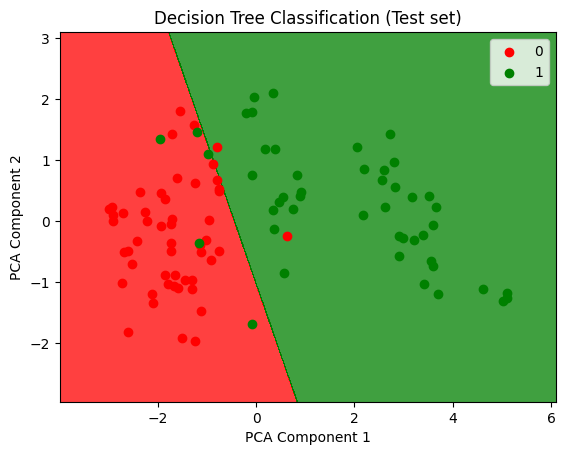

In [ ]:
# Visualisasi hasil model Decision Tree Classification dari Test set
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
# Instead of creating a meshgrid of 2 features, consider using PCA to reduce dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_set = pca.fit_transform(X_set)
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

# Predict on the transformed data using pca.inverse_transform
plt.contourf(X1, X2, classifier.predict(pca.inverse_transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Decision Tree Classification (Test set)') # Corrected title
plt.xlabel('PCA Component 1')  # Update x-axis label
plt.ylabel('PCA Component 2')  # Update y-axis label
plt.legend()
plt.show()

Pada gambar kedua (Test Set), hasil klasifikasi pada data uji menunjukkan pola pemisahan yang hampir sama dengan data pelatihan. Namun, terdapat beberapa perbedaan penting:

* Pola batas keputusan tetap sama, menunjukkan bahwa model mempertahankan pola pemisahan yang telah dipelajari dari data pelatihan.
* Jumlah titik yang salah klasifikasi di test set tampaknya sedikit lebih banyak dibandingkan training set, yang mengindikasikan kemungkinan overfitting.
* Beberapa titik hijau muncul di area merah dan sebaliknya, menunjukkan bahwa model mengalami kesalahan prediksi yang dapat disebabkan oleh kompleksitas data atau distribusi yang berbeda antara training dan test set.

Hasil visualisasi data testing menunjukkan mobil dengan konsumsi bahan bakar rendah diklasifikasikan sebagai hemat bahan bakar (hijau) dan juga sebaliknya. Namun terdapat beberapa mobil dengan konsumsi bahan bakar tinggi teridentfikasi sebagai hemat bahan bakar, dan juga sebaliknya. Namun jumlahnya lebih sedikit jika dibandingkan dengan training.

Visualisasi ini menunjukkan bahwa model Decision Tree mampu memisahkan dua kelas dengan cukup baik, meskipun terdapat beberapa kesalahan klasifikasi pada data uji yang dapat mengindikasikan overfitting.

# K-Means

**1. Pre-Processing Data**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Baca dataset MPG
data = pd.read_csv('auto-mpg.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Dari hasil informasi awal ini, terdapat kejanggalan pada data horsepower, karena secara logika seharusnya horsepower ialah float64 atau int64.

In [ ]:
# Investigasi dari data Horsepower
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Dari hasil investigasi tersebut dapat dilihat dan ditemukan bahwa terdapat data yang diisi dengan '?', yang menandakan tidak memiliki data atau missing value.

In [ ]:
# cek missing value
data[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


Dari investigasi diatas, dapat dijelaskan bahwa jumlah missing value yang berada pada dataset mpg.car tidak banyak hanya 6 data. Sehingga apabila missing value yang terjadi pada dataset hanya dikit kita dapat mengabaikan data dengan menghapusnya. Namun jika, missing value pada data memiliki jumlah banyak kita dapat mengganti missing value dengan nilai rata rata data.

In [ ]:
# menghilangkan missing value
data = data.dropna()
data = data[data['horsepower'] != '?']

# mengubah tipe data horsepower menjadi numeric
data['horsepower'] = pd.to_numeric(data['horsepower'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


Selanjutnya ialah kita melakukan seleksi fitur. Pada seleksi fitur ini kita dapat mengelompokkan secara manual mana yang penting atau berkolerasi terhadap dataset. Namun, kita juga bisa menggunakan visualiasi data (pair plot) untuk melihat grafik korelasinya.

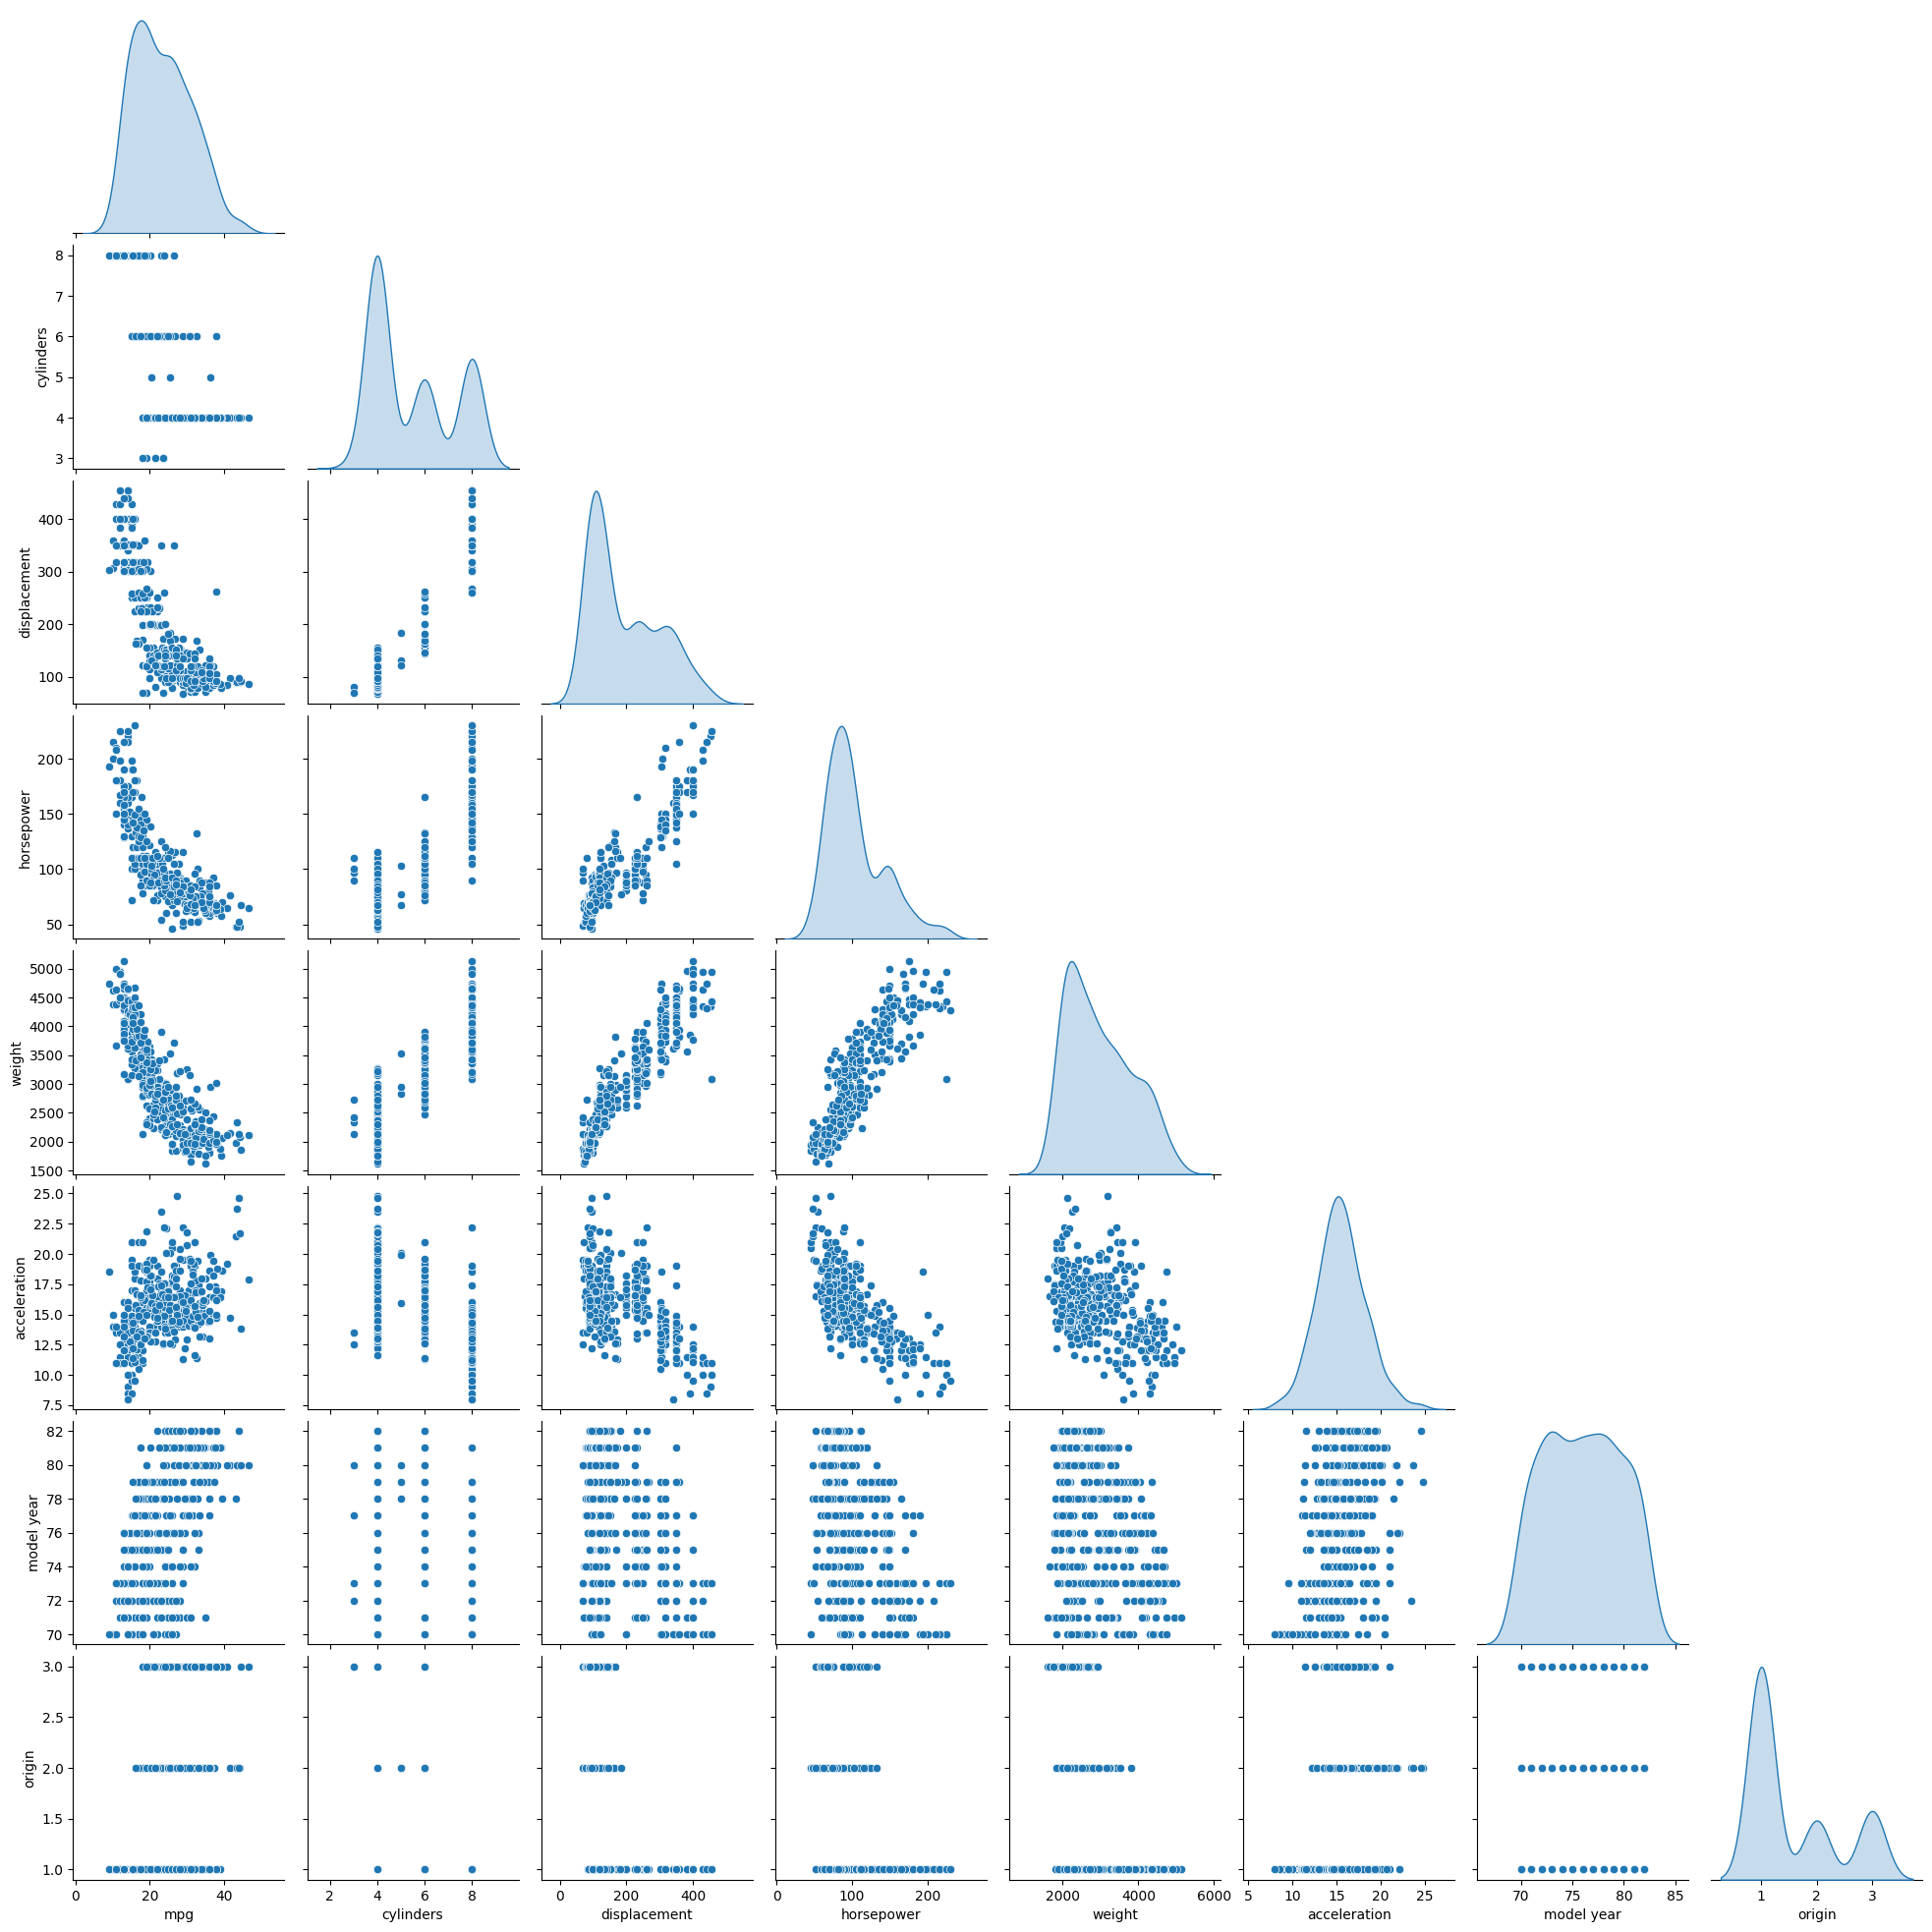

In [ ]:
sns.pairplot(data, corner=True, diag_kind="kde")
plt.show()

Dari hasil visualisasi tersebut dpaat dilihat bahwa, model year, dan origin sangat jelas tidak berpengaruh terhadap kolom MPG. Selain itu kolom acceleration, korelasinya dengan kolom MPG tidak terlalu kuat. Sehingga hal itu dapat dihilangkan atau dihapus.

Oleh karena itu dipilihlah 4 Fitur yang akan digunakan yaitu cylinders, displacement, horsepower dan weight.

In [ ]:
# pemilihan fitur yang digunakan
data_fitur = data[['cylinders', 'displacement', 'horsepower', 'weight']]
data_fitur = data_fitur.apply(pd.to_numeric)

df_label = data['mpg']

Karena di Indonesia lebih familiar dengan Kilogram dibandingkan pound (LBS) maka dilakukan konversi terhadap data menjadi kilogram dan miles pergalon menjadi KM perliter.

1 LBS = 0.4535923 Kg

1 Miles = 1.60934 KM

1 gallon = 3.78541 Liter

Sehingga LBS ke liter tinggal mengalikan dengan 0.4535923 dan Miles per Gallon ke KM/L mengalikan dengan 1.60934/3.78541

In [ ]:
# transformasi data
# di Indonesia kita mau pakai KG
data_fitur['weight'] = data_fitur['weight'] * 0.4535923

# transformasi M/G (Miles per Gallon) menjadi KM/L
df_label= df_label * 0.4251437

In [ ]:
# Normalisasi data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_fitur = scaler.fit_transform(data_fitur)

In [ ]:
# jika ada sebuah object misal seperti jenis kelamin, nah itu kita harus menggunakan label encoder
# hal ini dapat dengan import LabelEncoder dari sklearn.preprocessing cara menggunakannya sama seperti standarusasi

**2. Training Model**

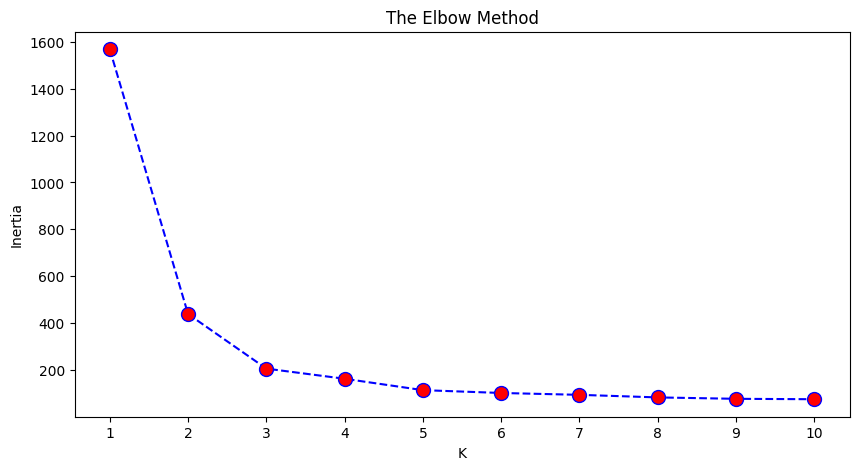

In [ ]:
from sklearn.cluster import KMeans
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data_fitur)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, color ='blue',
         linestyle = 'dashed', marker ='o',
         markerfacecolor = 'red', markersize = 10)
plt.title('The Elbow Method')
plt.xticks(range(1, 11, 1))
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

Berdasarkan grafik menggunakan metode Elbow, kita dapat mendapatkan bahwa nilai optimal jumlah k cluster dalam K-Means Clustering ialah di 2/ 3, karena penurunan inertia tidak signifikan lagi.

Untuk memastikan kita dapat menggunkan metode silhoutte score dan davis bouldin

**Silhoutte Score**

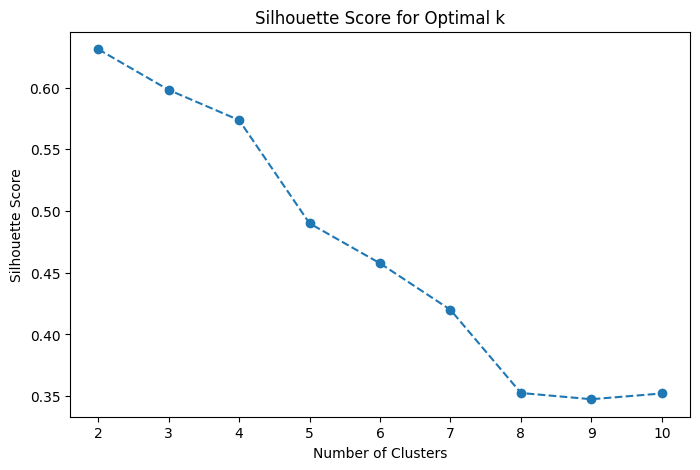

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_fitur)
    silhouette_scores.append(silhouette_score(data_fitur, labels))

# Plot Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

**Davies Bouldin**

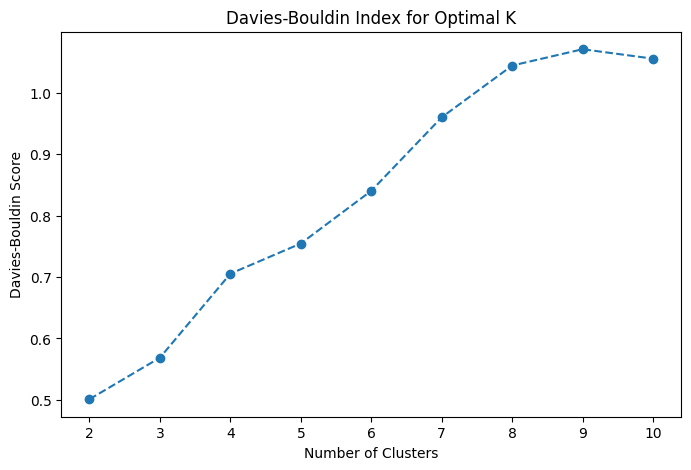

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

dbi_scores = []
K_range = range(2, 11)  # Minimal 2 kluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_fitur)
    dbi = davies_bouldin_score(data_fitur, labels)
    dbi_scores.append(dbi)

# Plot Davies-Bouldin Index
plt.figure(figsize=(8,5))
plt.plot(K_range, dbi_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Score")
plt.title("Davies-Bouldin Index for Optimal K")
plt.show()

Berdasarkan grafik dari penggunaan metode untuk menentukan jumlah k pada k-means metode, dapat ditentukan bahwa jumlah k ialah di 2.

Sehingga sekarang kita akan mencoba untuk mengelompokkan data kita dan mengevaluasi kluster yang dihasilkan dengan cara kluster tersebut dapat dikembalikan ke data awal.

**3. Evaluasi Model**

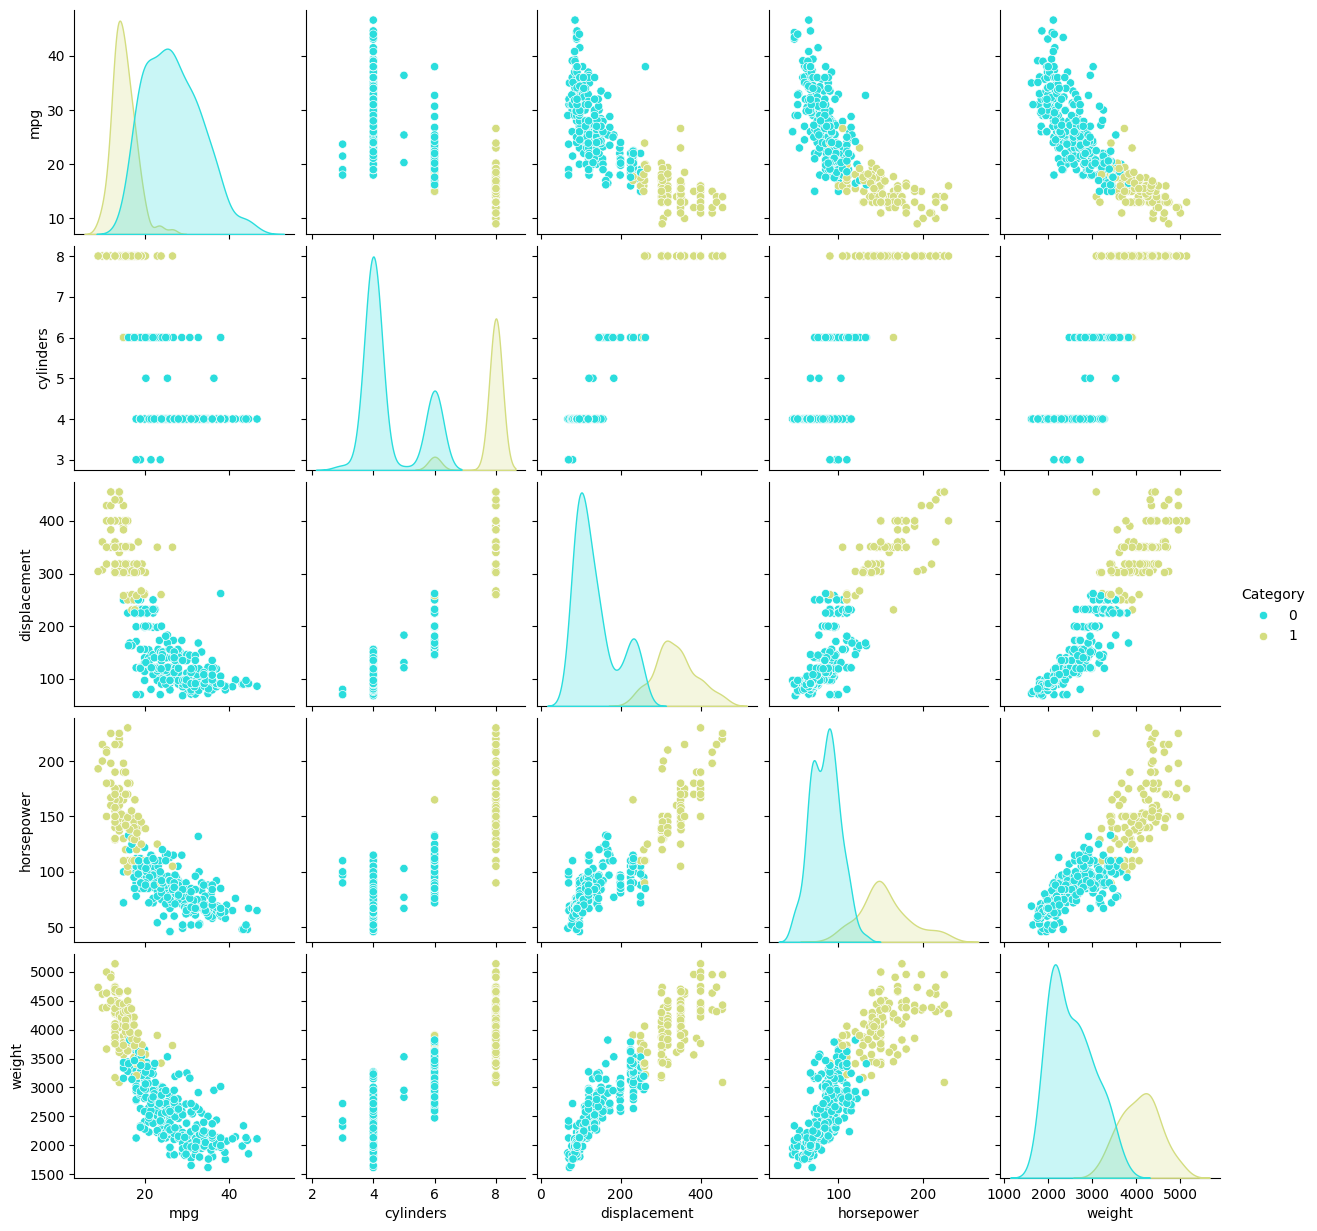

In [ ]:
# Melakukan K-Means Clustering dengan 3 cluster
km = KMeans(n_clusters=2, random_state=42)
km.fit(data_fitur)

# membaca kembali original data ke variable lain
# karena data untuk klustering telah diubah2
df_ori = data.copy()
df_ori.drop(columns=['origin', 'model year', 'acceleration'], inplace=True)

df_ori['Category'] = km.labels_
sns.pairplot(data=df_ori, hue='Category', palette='rainbow')

**Kesimpulan**

1. Kategori 0 (Biru Muda)

    → Cenderung memiliki nilai mpg lebih tinggi, yang berarti lebih hemat bahan bakar.

    → Memiliki displacement, horsepower, dan weight yang lebih rendah.
    
    → Didominasi oleh mobil dengan silinder lebih kecil (4 silinder atau kurang).

2. Kategori 1 (Kuning)

    → Cenderung memiliki mpg lebih rendah, yang berarti boros bahan bakar.

    → Memiliki displacement, horsepower, dan weight yang lebih tinggi.
    
    → Lebih banyak terdiri dari mobil dengan silinder lebih besar (6 atau 8 silinder).

# ANN

Memuat dan Menampilkan Dataset
* menggunakan pandas untuk membaca dataset auto-mpg.csv.
* `df.head()` digunakan untuk melihat beberapa baris pertama dataset, sehingga kita bisa memahami strukturnya.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

dfANN = pd.read_csv('auto-mpg.csv')
dfANN.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


Melihat data unique di kolom horsepower

In [ ]:
dfANN['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

### Data Cleaning & Preprocessing
python

* Dalam dataset ini, beberapa nilai di kolom horsepower berbentuk ?, yang bukan angka.
* Kode ini memastikan bahwa kita hanya menyimpan baris yang memiliki nilai numerik di horsepower.
* `pd.to_numeric(df['horsepower'])` mengubah kolom horsepower yang tadinya berupa teks menjadi tipe numerik (int atau float).


In [ ]:
# Menghilangkan semua MISSING value dan karakter "?"
dfANN = dfANN.replace('?', None).dropna()
# Memperbaiki tipe data horse power
dfANN['horsepower'] = pd.to_numeric(dfANN['horsepower'])
# Menghapus colom car name
dfANN = dfANN.drop(columns=['car name'])
dfANN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


### Memisahkan fitur dan target
* mpg adalah variabel target yang ingin kita prediksi.
* X berisi semua fitur lainnya, sedangkan y berisi hanya kolom mpg.

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = dfANN.drop(columns=['mpg'])  # Semua fitur kecuali target
y = dfANN['mpg']  # Target (mpg)

* Jika dataset memiliki kolom kategori (misalnya jenis mobil), kita perlu mengubahnya menjadi bentuk numerik dengan One-Hot Encoding.
* `pd.get_dummies(X, drop_first=True)` mengubah data kategori menjadi beberapa kolom biner.

In [ ]:
# One-hot encoding jika ada fitur kategori
X = pd.get_dummies(X, drop_first=True)

### Membagi Data Menjadi Training dan Test Set
* `train_test_split()` membagi dataset menjadi data latih (80%) dan data uji (20%).
* `random_state=42` digunakan agar hasil pembagian selalu sama setiap kali dijalankan.

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perbaikan: Cek apakah data sudah terbagi dengan benar
print("Shape X_train:", X_train.shape, "Shape y_train:", y_train.shape)


Shape X_train: (313, 7) Shape y_train: (313,)


Normalisasi Fitur
* Normalisasi penting dalam ANN agar semua fitur berada dalam skala yang sama, sehingga training lebih stabil.
* `StandardScaler()` mengubah data sehingga memiliki mean = 0 dan standar deviasi = 1.

In [ ]:
# Normalisasi fitur
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Split validation training data

In [ ]:
# 6. Split validation set dari training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


### Membangun Model ANN
* menggunakan **TensorFlow & Keras** untuk membangun model ANN.
* `Sequential` adalah model ANN yang terdiri dari lapisan bertingkat (layer).
* `Dense` adalah jenis lapisan dasar ANN, di mana setiap neuron terhubung ke semua neuron di lapisan berikutnya.

In [ ]:
# Membuat model ANN
ModelRegresi = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer pertama
    Dense(8, activation='relu'),  # Hidden layer kedua
    Dense(1, activation='linear')  # Output layer untuk regresi
])

* **Hidden layer pertama**:

`Dense(16, activation='relu', input_shape=(X_train.shape[1],))` berarti lapisan ini memiliki 16 neuron, menggunakan fungsi aktivasi ReLU, dan menerima input sebanyak fitur yang ada di dataset.
* **Hidden layer kedua**:

`Dense(8, activation='relu')` berarti memiliki 8 neuron dengan aktivasi ReLU.
* **Output layer**:

`Dense(1)` karena kita hanya ingin memprediksi 1 nilai (mpg).

Optimasi
* `adam` adalah algoritma optimasi yang digunakan untuk memperbarui bobot ANN.
* `loss='mse'` (Mean Squared Error) karena kita melakukan regresi.
* `metrics=['mae']` untuk mengevaluasi error dalam satuan asli data (mpg).
* `model.summary()` menampilkan ringkasan struktur model ANN.

In [ ]:
# Compile model
ModelRegresi.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Menampilkan arsitektur model
ModelRegresi.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

### Melatih Model

* `epochs=100` → Model akan belajar sebanyak 100 kali dari data.
* `batch_size=10` → Data akan diproses dalam kelompok kecil berisi 10 sampel sekaligus.
* `validation_data=(X_test, y_test)` → Model akan mengevaluasi performanya di data uji setelah setiap epoch.

In [ ]:
# Melatih model dengan 100 epoch
history = ModelRegresi.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=20, verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 673.4106 - mae: 24.4334 - val_loss: 594.8795 - val_mae: 23.1652
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 658.5120 - mae: 24.1272 - val_loss: 582.3271 - val_mae: 22.9047
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 647.0073 - mae: 23.8594 - val_loss: 568.7080 - val_mae: 22.6204
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 592.0557 - mae: 22.8845 - val_loss: 554.4075 - val_mae: 22.3163
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 601.6721 - mae: 22.9915 - val_loss: 538.0938 - val_mae: 21.9685
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 557.9850 - mae: 22.1942 - val_loss: 520.6625 - val_mae: 21.5895
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 548.8735 - mae: 22.0419 - val_loss: 500.9059 - val_mae: 21.1531
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 497.8410 - mae: 20.9657 - val_loss: 478.9921 - val_mae: 20.6612
Epoch 9/100
13

In [ ]:
# Perbaikan: Cek apakah history berisi data atau kosong
print("History Keys:", history.history.keys())
print("Sample Loss Values:", history.history['loss'][:5])

History Keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Sample Loss Values: [640.623046875, 626.8341064453125, 612.6171264648438, 596.4061889648438, 579.6177368164062]


### Grafik Kiri: Training vs Validation MAE (Mean Absolute Error)
* MAE adalah rata-rata selisih absolut antara prediksi dan nilai sebenarnya.
Interpretasi:
* Pada epoch awal, MAE sangat tinggi (sekitar 22-23), berarti prediksi model masih jauh dari nilai asli.
* Setelah sekitar 20 epoch, MAE mulai turun drastis dan kemudian stabil mendekati 2-3, yang berarti model semakin akurat.
* Training dan Validation MAE memiliki tren yang hampir sama, menunjukkan bahwa model tidak mengalami overfitting.

Kesimpulan:
Model belajar dengan baik, error semakin kecil, dan tidak ada tanda-tanda overfitting.

#### Grafik Kanan: Training vs Validation Loss (MSE)
* Loss (MSE - Mean Squared Error) mengukur seberapa jauh rata-rata kuadrat error antara prediksi dan nilai asli.
* Interpretasi:
* Pada epoch awal, loss sangat tinggi (di atas 600), menunjukkan model masih belum akurat.
* Setelah 20 epoch, loss turun drastis dan mendekati 0 setelah 60 epoch.
* Training dan Validation Loss hampir identik, yang berarti model tidak mengalami overfitting.

Kesimpulan:
Model mencapai konvergensi (stabil) setelah sekitar 20-30 epoch. Training lebih lanjut (sampai 100 epoch) hanya membawa sedikit peningkatan.

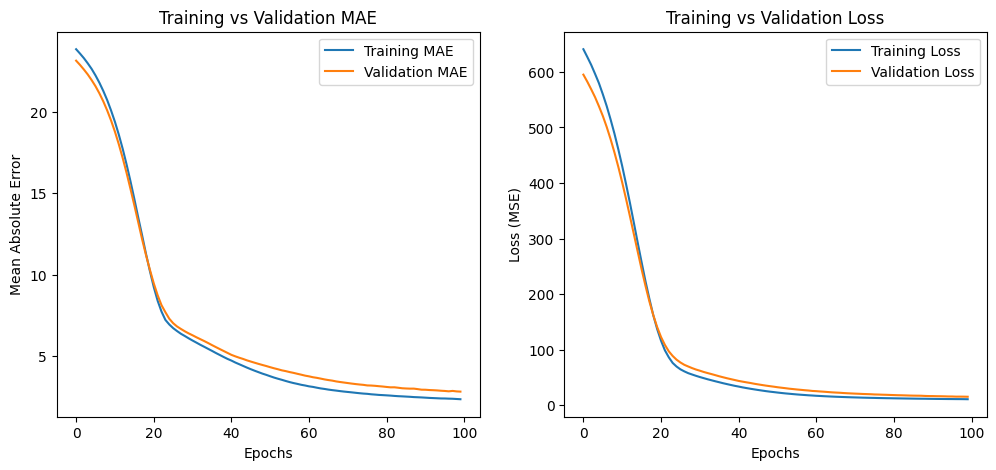

In [ ]:
plt.figure(figsize=(12, 5))

# Plot MAE
plt.subplot(1, 2, 1)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.title("Training vs Validation MAE")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

### Evaluasi Model
* `model.evaluate(X_test, y_test)` mengukur performa model di data uji.
* **Mean Absolute Error (MAE)** menunjukkan seberapa besar rata-rata kesalahan prediksi.

In [ ]:
# Evaluasi model
y_pred = ModelRegresi.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

Mean Squared Error (MSE): 10.763815417756051
R-squared (R2 Score): 0.7891126093294926


* Model ANN cukup baik dalam memprediksi MPG, dengan R² = 0.789, artinya model menjelaskan 78.9% dari variasi data.
* MSE = 10.75, menunjukkan bahwa rata-rata error model tidak terlalu besar.

### Kesimpulan Akhir
* ✅ Model ANN dapat digunakan untuk prediksi MPG secara efektif.
* ✅ Prediksi semakin akurat setelah ~30 epoch (bisa gunakan Early Stopping untuk efisiensi).
* ✅ Model tidak mengalami overfitting, artinya bisa bekerja baik di data baru.
* ✅ Masih bisa ditingkatkan dengan hyperparameter tuning (misalnya menambah neuron atau mencoba learning rate berbeda).